<a href="https://colab.research.google.com/github/Dabii19/CFE-IA-E2/blob/main/RegresionLinealMultipleV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('clinica.csv')

df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
# Renombrar variables a español
df = df.rename(columns={
    'age': 'edad',
    'anaemia': 'anemia',
    'creatinine_phosphokinase': 'fosf',
    'diabetes': 'diabetes',
    'ejection_fraction': 'eyeccion',
    'high_blood_pressure': 'hipertension',
    'platelets': 'plaquetas',
    'serum_creatinine': 'creatinina',
    'serum_sodium': 'sodio',
    'sex': 'sexo',
    'smoking': 'fumador',
    'time': 'tiempo',
    'DEATH_EVENT': 'muerte'
})
df.head(5)

,edad,anemia,fosf,diabetes,eyeccion,hipertension,plaquetas,creatinina,sodio,sexo,fumador,tiempo,muerte
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


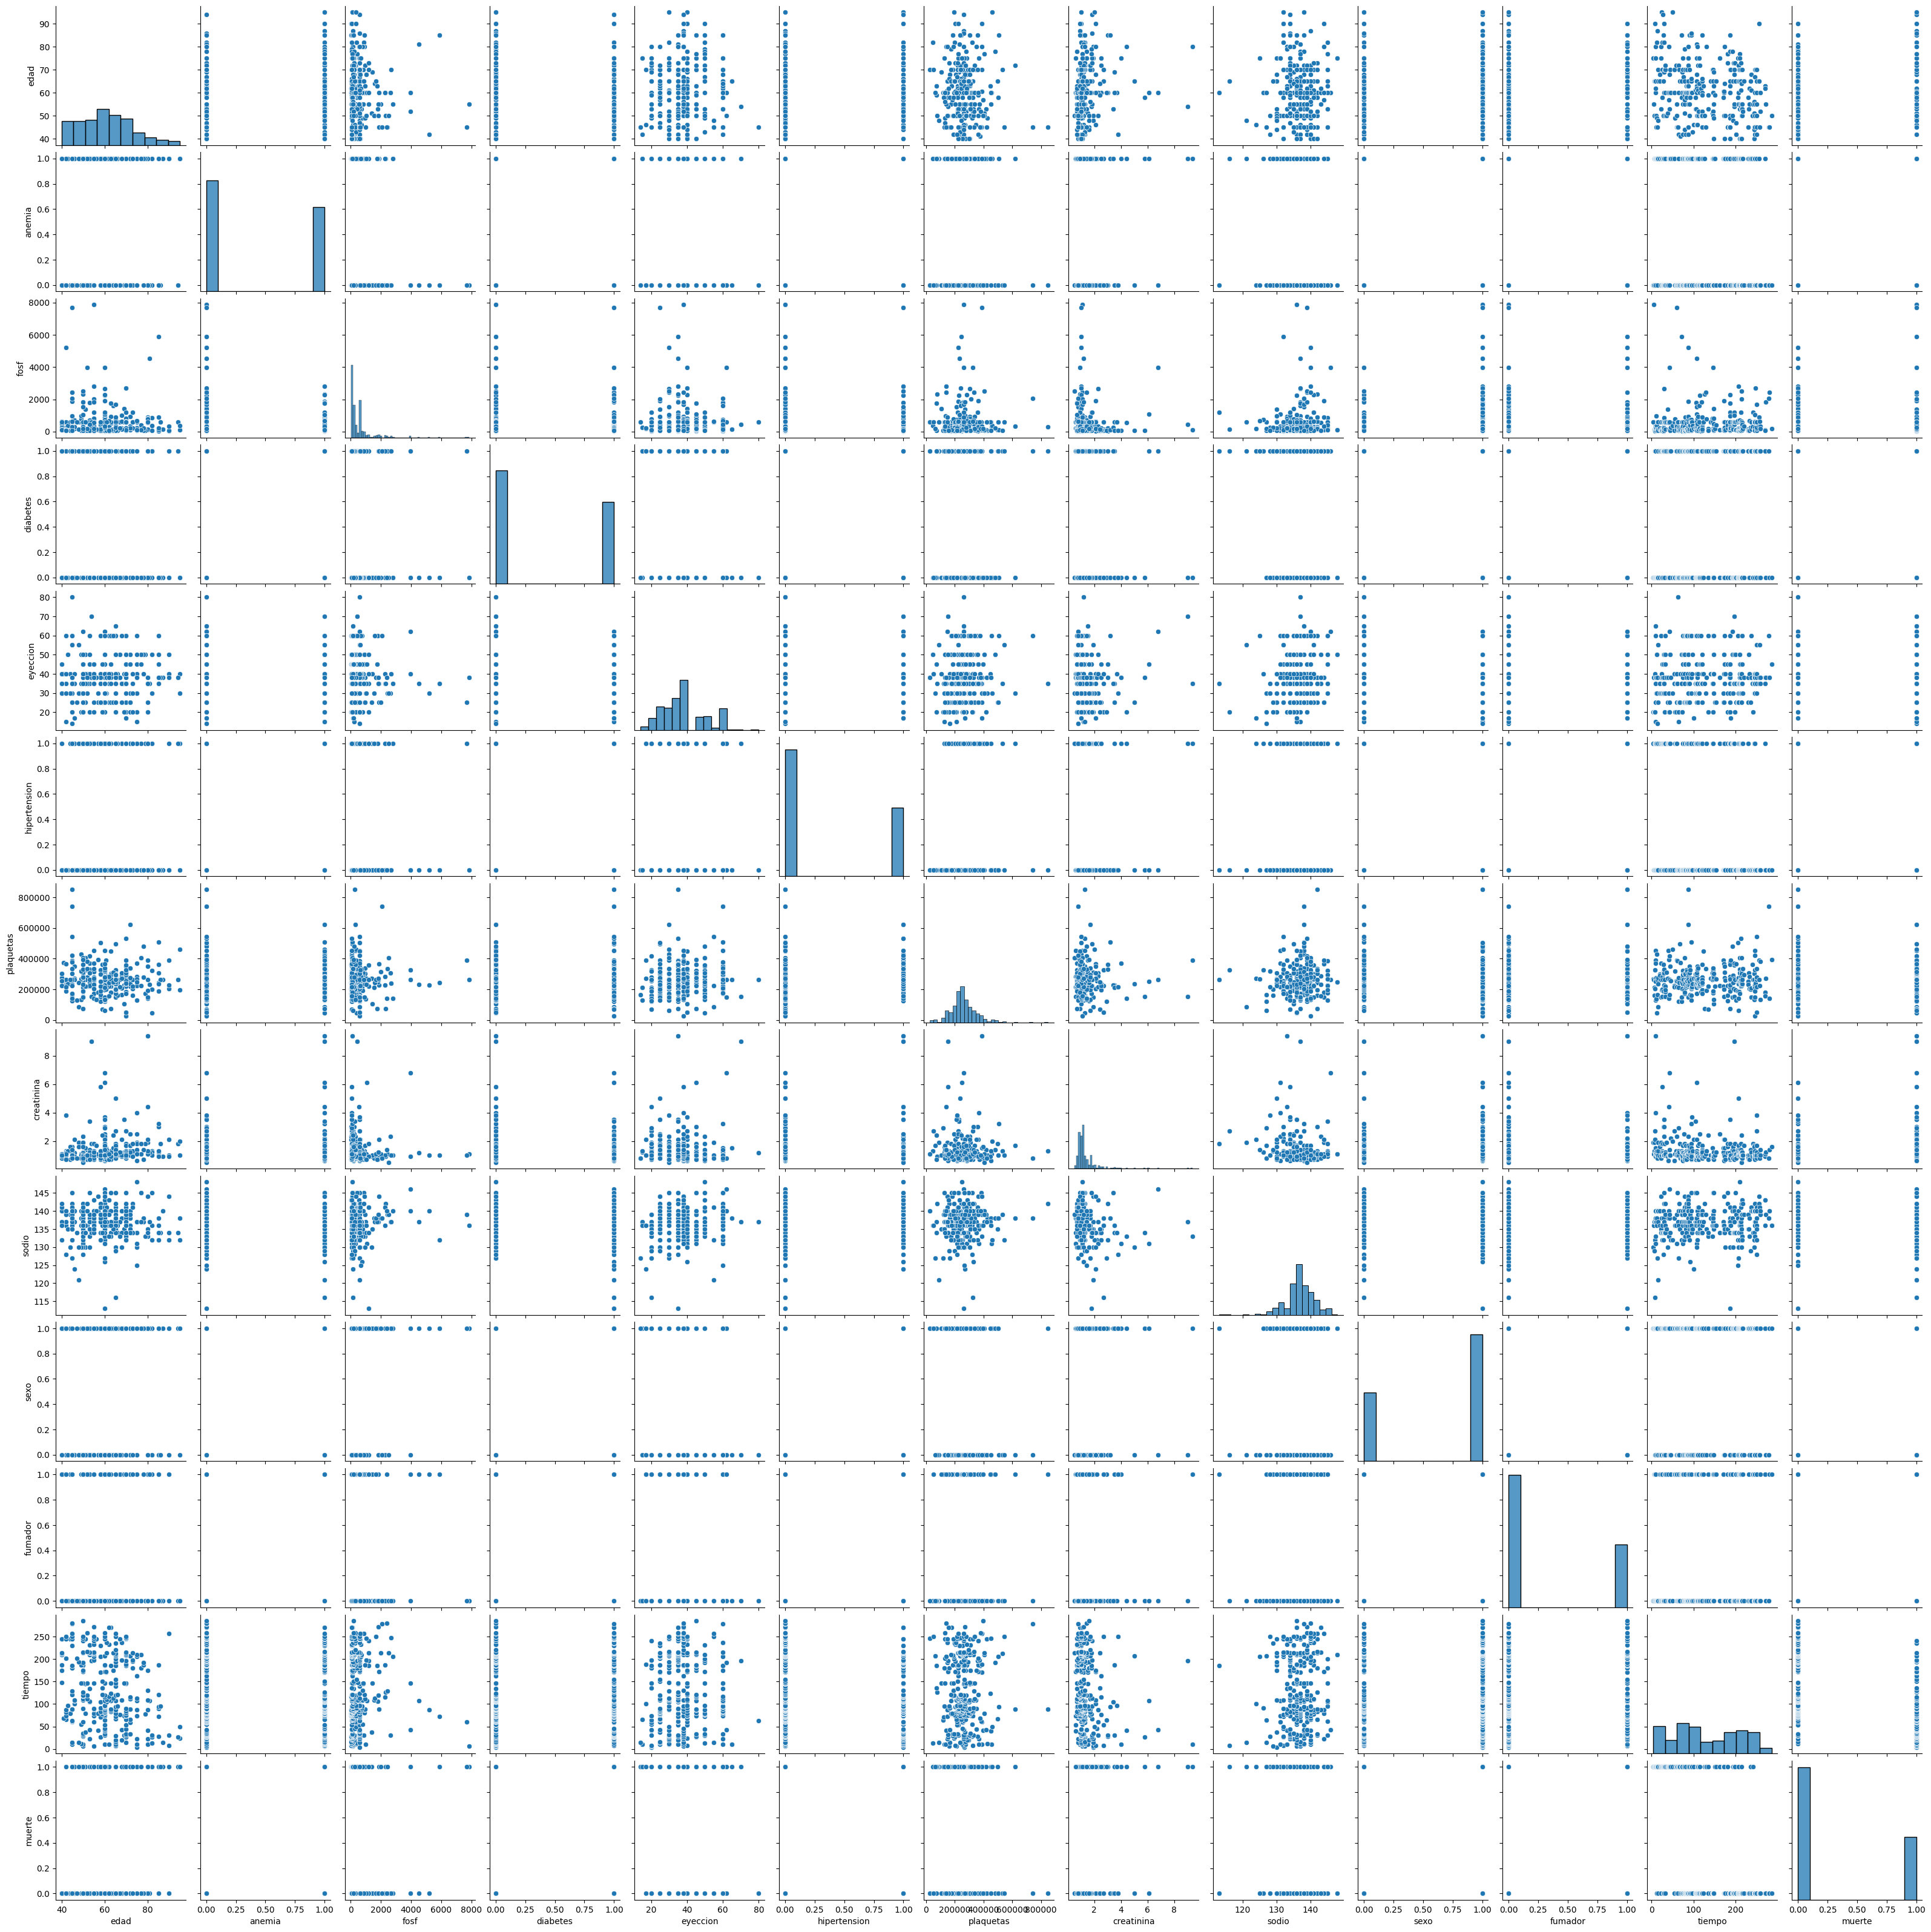

In [3]:
# Librerías para crear y mostrar las gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas del dataset clínico
cols = ['edad', 'anemia', 'fosf', 'diabetes', 'eyeccion', 'hipertension',
        'plaquetas', 'creatinina', 'sodio', 'sexo', 'fumador', 'tiempo', 'muerte']

# Crear pairplot para explorar relaciones
sns.pairplot(df[cols])
plt.show()

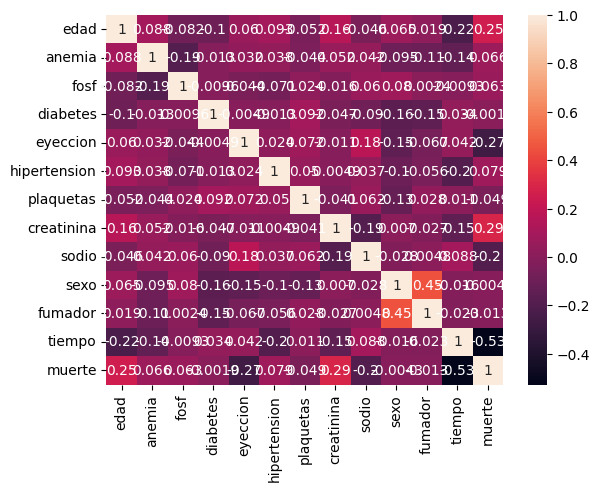

In [4]:
sns.heatmap(df[cols].corr(), annot = True)
plt.show()

In [5]:
# Entrenamiento

# Independiente edad y tiempo - Dependiente Muerte x_x

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Variables independientes
X = df[['edad', 'tiempo']].values

# Variables dependientes
Y = df['muerte'].values.reshape(-1,1)

# Funcion para estandarizar
sx = StandardScaler()
sy = StandardScaler()

# Ajusta valores
X_s = sx.fit_transform(X)
Y_s = sy.fit_transform(Y)

lr = LinearRegression()
lr.fit(X_s, Y_s)

LinearRegression()

In [39]:
import numpy as np

edad = 70
tiempo = 20

# Entrada estandarizada
input_s = sx.transform(np.array([[edad, tiempo]]))
# Salida estandarizada
output_s = lr.predict(input_s)
# Salida des-estandarizada
output = sy.inverse_transform(output_s)

print("Probabilidad de fallecimiento: ", round(output[0][0] * 100, 2), '%')

Probabilidad de fallecimiento:  70.14 %
